<a href="https://colab.research.google.com/github/movie112/INU-DILAB/blob/main/dacon/titanic/titanic_deep_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [재난] 타이타닉: 누가 살아남았을까?   
- 참고: [blog_Titanic 생존자 예측 심화편#1](https://blog.naver.com/fkdldjs60/221919606816)
- 범주형데이터 전처리
  - 간단하게 분류되는 데이터
- 기존 변수 조합


In [41]:
import pandas as pd
import seaborn as sns

In [42]:
cd drive/MyDrive/data/titanic

[Errno 2] No such file or directory: 'drive/MyDrive/data/titanic'
/content/drive/MyDrive/data/titanic


In [43]:
train = pd.read_csv('train.csv')
print(train.shape)

(891, 12)


In [44]:
test = pd.read_csv('test.csv')
print(test.shape)

(418, 11)


In [47]:
train['Sex_encode'] = train['Sex'].replace('male', 0).replace('female', 1)
test['Sex_encode'] = train['Sex'].replace('male', 0).replace('female', 1)

---
## 범주형데이터 전처리
#### 선착장데이터 처리
- 범주형데이터는 0, 1로 만드는 것이 좋음
- 새로운 변수를 True, False 값만 갖도록 만든다.

In [48]:
train['Embarked_Q'] = train['Embarked'] == 'Q'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'

train[['Embarked', 'Embarked_Q', 'Embarked_S', 'Embarked_C']].head()

,Embarked,Embarked_Q,Embarked_S,Embarked_C
0,S,False,True,False
1,C,False,False,True
2,S,False,True,False
3,S,False,True,False
4,S,False,True,False


In [49]:
test['Embarked_Q'] = test['Embarked'] == 'Q'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'

---
## 기존 변수 조합
#### SibSp, Parch 조합
- SibSp: 동승한 형제/자매
- Parch: 동승한 부모 및 자녀 수
- Family: 가족 수
  - SibSp + Parch + 1(본인)

In [50]:
train['Family'] = train['SibSp'] + train['Parch'] +1

In [51]:
test['Family'] = test['SibSp'] + test['Parch'] +1

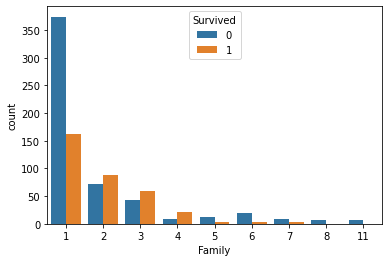

In [52]:
sns.countplot(data=train, x='Family', hue='Survived')

__총 가족수가 1명인 탑승자가 가장 많고 생존자도 가장 많지만 생존율은 그다지 크지 않다__  

__가족수가 2, 3, 4명인 탑승자는 1명인 탑승자에 비해 적으나 생존율은 더 높고, 가족수가 5, 6, 7, 8, 11명인 탑승자는 그 수가 비교적 적고 생존율도 희박.__




#### 1명이면 Single, 총 가족수가 2 ~ 4명이면 Nuclear, 총가족수가 5명 이상이면 Big으로 변환 함수 정의

In [53]:
def Family_type(Family):
  if Family == 1:
    return 'Single'
  elif Family > 1 and Family < 5:
    return 'Nuclear'
  else:
    return 'Big'

#### 함수적용: apply

In [54]:
train['Family_type'] = train['Family'].apply(Family_type)
train[['Family_type', 'Family']].head()

,Family_type,Family
0,Nuclear,2
1,Nuclear,2
2,Single,1
3,Nuclear,2
4,Single,1


In [55]:
test['Family_type'] = test['Family'].apply(Family_type)

#### 범주형데이터 처리

In [56]:
train['Single'] = train['Family_type'] == 'Single'
train['Nuclear'] = train['Family_type'] == 'Nuclear'
train['Big'] = train['Family_type'] == 'Big'

train[['Family_type', 'Single', 'Nuclear', 'Big']].head()

,Family_type,Single,Nuclear,Big
0,Nuclear,False,True,False
1,Nuclear,False,True,False
2,Single,True,False,False
3,Nuclear,False,True,False
4,Single,True,False,False


In [57]:
test['Single'] = test['Family_type'] == 'Single'
test['Nuclear'] = test['Family_type'] == 'Nuclear'
test['Big'] = test['Family_type'] == 'Big'

---
#### 상관관계

In [58]:
corr = train.corr()
corr['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Sex_encode     0.543351
Embarked_Q     0.003650
Embarked_S    -0.155660
Embarked_C     0.168240
Family         0.016639
Single        -0.203367
Nuclear        0.279855
Big           -0.125147
Name: Survived, dtype: float64

__기존 SibSp, Parch는 전혀 상관 없는 값이었는데 Single, Nuclear, Big은 상관관계 어느정도 갖는다__

#### 데이터 만들기

- 결측값

In [59]:
test['Fare'] = test['Fare'].fillna(0)

In [64]:
features = ['Pclass', 'Sex_encode', 'Embarked_Q', 'Embarked_S', 'Embarked_C', 'Single', 'Nuclear', 'Big']

In [65]:
x_train=train[features]
x_test=test[features]
y_train=train['Survived']

In [66]:
x_train.head()

,Pclass,Sex_encode,Embarked_Q,Embarked_S,Embarked_C,Single,Nuclear,Big
0,3,0,False,True,False,False,True,False
1,1,1,False,False,True,False,True,False
2,3,1,False,True,False,True,False,False
3,1,1,False,True,False,False,True,False
4,3,0,False,True,False,True,False,False


#### 이전과 동일하게 진행

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10, max_features=0.9)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv=10).mean()
score

0.8002621722846441